<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Intro to Images & MNIST

---


In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage import data
from sklearn.datasets import load_digits

#plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['image.cmap'] = 'gray'

## Basic Image and Color Set Up

Image data is just a matrix of numbers!

0.9999952435015409
1.9364815003752867e-06


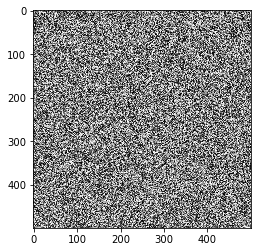

In [26]:
random_image = np.random.random([500, 500])

print(np.max(random_image))
print(np.min(random_image))

# Try 'plasma' and 'magma'
plt.imshow(random_image, cmap='gray', interpolation='nearest');

In [27]:
cat = data.chelsea()

print(cat.shape)
print(cat.min())
print(cat.max())
print(cat[0, 0, :])

(300, 451, 3)
0
231
[143 120 104]


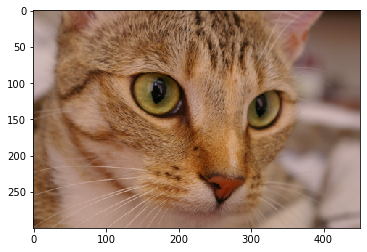

In [28]:
plt.imshow(cat, interpolation='nearest');

We can simply modify some of the values here to change colors. The last dimension of the picture is a 3-column array with values in `[red, green, blue]` notation where 0 is the darkest / black value and 255 is the lightest / white value.

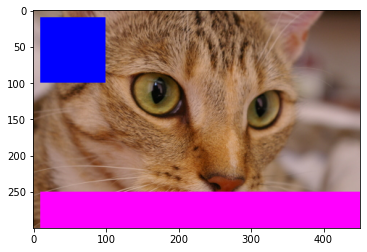

In [29]:
cat[10:100, 10:100, :] = [0, 0, 255]
cat[250:300, 10:500, :] = [255, 0, 255]
plt.imshow(cat);

We can also represent the color data as a ratio from 0-1 where 0 is black and 1 is white 

[[0.56078431 0.47058824 0.40784314]
 [0.56078431 0.47058824 0.40784314]
 [0.55294118 0.4627451  0.4       ]
 [0.55294118 0.4627451  0.4       ]
 [0.55294118 0.4627451  0.4       ]]


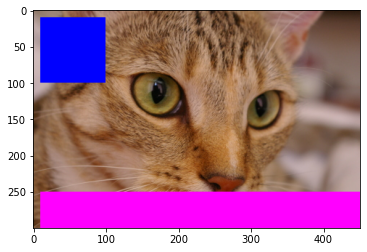

In [30]:
from skimage import img_as_float, img_as_ubyte

print(img_as_float(cat)[0, 0:5])
plt.imshow(img_as_float(cat));

Grayscale images lack this color data and so by default will take the default color map -- you should specify that you want gray

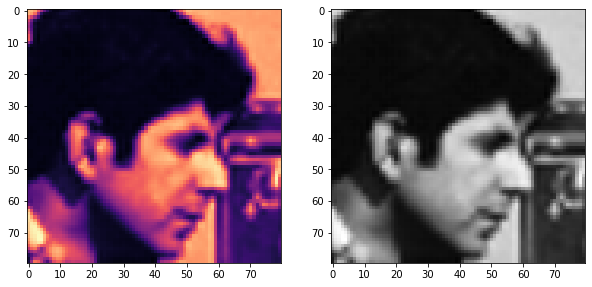

In [31]:
image = data.camera()          # demo image from old camera
face = image[80:160, 200:280]

fig, (ax_jet, ax_gray) = plt.subplots(ncols=2, figsize=(10, 5))

ax_jet.imshow(face, cmap='magma', interpolation='nearest')
ax_gray.imshow(face, cmap='gray',  interpolation='nearest');

## MNIST Dataset

Let's try out some image recognition using the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database)! 

Thankfully, there is a built-in data set that exists called MNIST, which is a set of handwritten digits. Let's practice modeling that now using a modified version of [this fine sklearn tutorial](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).

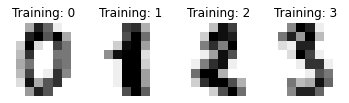

In [32]:
digits = load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray_r', interpolation='nearest')
    plt.title('Training: %i' % label)

In [33]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [34]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(digits.images[0].shape)
print(data.shape)
print(data[0])

(8, 8)
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


To reshape one single image you can also use `np.ravel` to turn it into a 1D vector:

In [35]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [36]:
np.ravel(digits.images[0])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [37]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Now we just set up a classifier and predict like normal. Note that the model should expect that all inputs are going to be the same size!

In [38]:
data[0:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [40]:
y = digits.target

print(y[0:5])
print(set(y))

[0 1 2 3 4]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2)

for train_idx, test_idx in skf.split(data, y):
    x_train, y_train = data[train_idx], y[train_idx]
    x_test, y_test = data[test_idx], y[test_idx]
    
print(set(y_train), set(y_test))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9} {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [42]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.9342984409799554

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rf.predict(x_test)))

print(classification_report(y_test, rf.predict(x_test)))

[[88  0  0  0  1  0  0  0  0  0]
 [ 0 83  0  1  0  1  0  0  0  6]
 [ 1  0 80  6  0  0  0  0  0  1]
 [ 0  1  0 79  0  1  0  3  7  1]
 [ 1  0  0  0 85  1  0  2  0  1]
 [ 0  0  0  0  1 85  1  0  0  4]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  0  0 88  0  0]
 [ 0  3  1  0  1  4  0  0 77  1]
 [ 0  0  0  2  0  3  0  0  1 84]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.94      0.91      0.93        91
           2       0.99      0.91      0.95        88
           3       0.90      0.86      0.88        92
           4       0.96      0.94      0.95        90
           5       0.89      0.93      0.91        91
           6       0.99      0.99      0.99        91
           7       0.95      0.99      0.97        89
           8       0.91      0.89      0.90        87
           9       0.86      0.93      0.89        90

    accuracy                           0.93       898
   macro avg       

In [46]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'max_depth': [5, 10, 20],
    'n_estimators': [10, 100, 1000],
    'criterion': ['gini', 'entropy']
}

In [47]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=params_grid, 
                           n_jobs=-1, verbose=10)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   15.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   17.2s finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'n_estimators': [10, 100, 1000]},
             verbose=10)

In [48]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1000)

In [49]:
grid_search.best_score_

0.9254934823091248

In [50]:
grid_search.best_estimator_.score(x_test, y_test)

0.9320712694877505

In [52]:
print(confusion_matrix(y_test, grid_search.best_estimator_.predict(x_test)))
print(classification_report(y_test, grid_search.best_estimator_.predict(x_test)))

[[88  0  0  0  1  0  0  0  0  0]
 [ 0 80  0  2  0  1  0  0  0  8]
 [ 1  0 79  6  0  0  0  0  0  2]
 [ 1  1  0 79  0  3  0  3  5  0]
 [ 1  0  0  0 85  1  0  2  0  1]
 [ 0  0  0  0  0 85  1  0  0  5]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  3  1  1  1  4  0  1 75  1]
 [ 0  0  0  0  0  2  0  0  1 87]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        89
           1       0.95      0.88      0.91        91
           2       0.99      0.90      0.94        88
           3       0.90      0.86      0.88        92
           4       0.98      0.94      0.96        90
           5       0.89      0.93      0.91        91
           6       0.99      1.00      0.99        91
           7       0.94      0.99      0.96        89
           8       0.91      0.86      0.89        87
           9       0.84      0.97      0.90        90

    accuracy                           0.93       898
   macro avg       